In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
rawdf = pd.read_csv("./train.csv")

In [7]:
rawdf.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


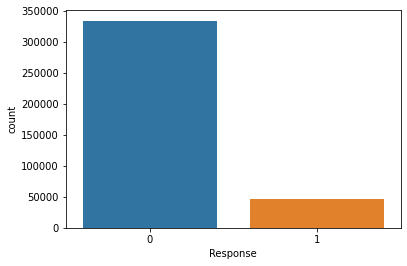

In [4]:
b = sns.countplot(x="Response",data=rawdf)

## Hypothesis Question
* 1.is the customer not interested in insurance when high annual premium? 
* 2.is the customer not interested in insurance when the region as City ? 
* 3.is the customer not interested in insurance when the region as rural? 
* 4.is unlicensed customer not interested in insurance?
* 5.has vehicle damage,  

## varriable Identification

In [8]:
rawdf.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

### Integer Data type

In [9]:
rawdf.dtypes[rawdf.dtypes=="int64"]

id                    int64
Age                   int64
Driving_License       int64
Previously_Insured    int64
Vintage               int64
Response              int64
dtype: object

In [10]:
# Driving_License, Previously_Insured,Response is a categorical varriable so we convert it into category
rawdf["Driving_License"] = rawdf["Driving_License"].astype("category") 
rawdf["Previously_Insured"] = rawdf["Previously_Insured"].astype("category") 
rawdf["Driving_License"] = rawdf["Driving_License"].astype("category") 
rawdf["Response"] = rawdf["Response"].astype("category")

### Float data type

In [11]:
rawdf.dtypes[rawdf.dtypes == "float64"]

Region_Code             float64
Annual_Premium          float64
Policy_Sales_Channel    float64
dtype: object

In [12]:
rawdf["Region_Code"] = rawdf["Region_Code"].astype("category")
rawdf["Policy_Sales_Channel"] = rawdf["Policy_Sales_Channel"].astype("category")

In [13]:
rawdf.dtypes[rawdf.dtypes=="object"]

Gender            object
Vehicle_Age       object
Vehicle_Damage    object
dtype: object

In [14]:
rawdf["Gender"] = rawdf["Gender"].astype("category")
rawdf["Vehicle_Age"] = rawdf["Vehicle_Age"].astype("category")
rawdf["Vehicle_Damage"] = rawdf["Vehicle_Damage"].astype("category")
rawdf["Vehicle_Age"].unique()

['> 2 Years', '1-2 Year', '< 1 Year']
Categories (3, object): ['> 2 Years', '1-2 Year', '< 1 Year']

In [15]:
rawdf.dtypes

id                         int64
Gender                  category
Age                        int64
Driving_License         category
Region_Code             category
Previously_Insured      category
Vehicle_Age             category
Vehicle_Damage          category
Annual_Premium           float64
Policy_Sales_Channel    category
Vintage                    int64
Response                category
dtype: object

## Univariate Analysis

In [16]:
rawdf.describe()

,id,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,30564.389581,154.347397
std,110016.836208,15.511611,17213.155057,83.671304
min,1.000000,20.000000,2630.000000,10.000000
25%,95278.000000,25.000000,24405.000000,82.000000
50%,190555.000000,36.000000,31669.000000,154.000000
75%,285832.000000,49.000000,39400.000000,227.000000
max,381109.000000,85.000000,540165.000000,299.000000


### Univariate Analysis Integer

In [17]:
def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [18]:
# get numeric varriables
rawdf.select_dtypes(include=['int64','float64','Int64']).dtypes

id                  int64
Age                 int64
Annual_Premium    float64
Vintage             int64
dtype: object

In [19]:
#Segregating varriables into groups
customer_details = ["Age","Vintage"]

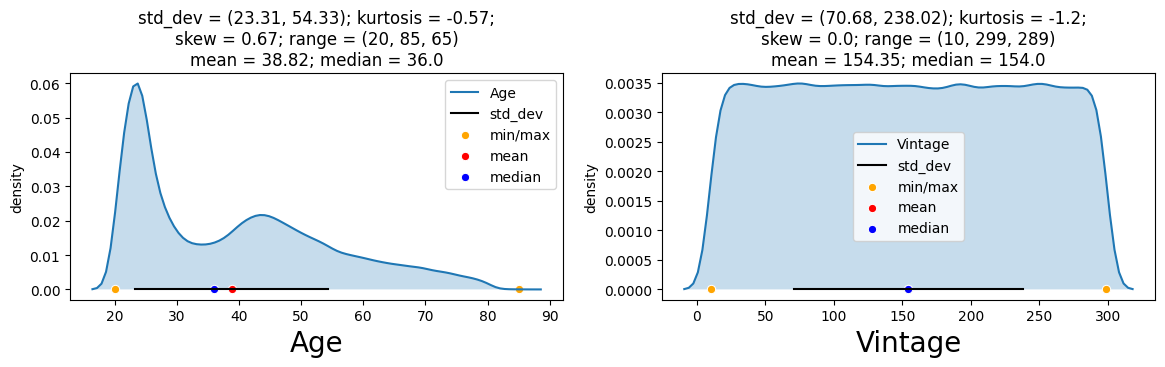

In [20]:
UVA_numeric(rawdf,customer_details)

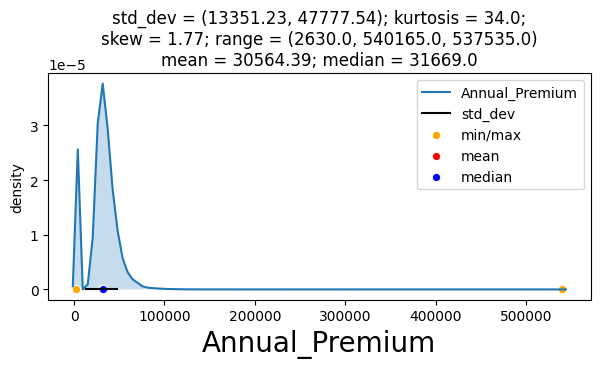

In [23]:
UVA_numeric(rawdf,["Annual_Premium"])

#### summary
* Most of the customers Age between 20 to 30 and 40 to 50 some peak there.
* vintage is normaly distributed. Average vintage value is 150
* Annual Premium is Highly skewed and also more kurtosis value so it has a extreme outliers 

### Univariate Analysis - Category

In [64]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    n_uni = data[i].nunique()
    if n_uni > 20:
        norm_count1 = data[i].value_counts(normalize = True)
        norm_count = norm_count1.sort_values().tail(20) 
    else:
        norm_count = data[i].value_counts(normalize = True)
    

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [54]:
rawdf.select_dtypes(include=["category"]).dtypes

Gender                  category
Driving_License         category
Region_Code             category
Previously_Insured      category
Vehicle_Age             category
Vehicle_Damage          category
Policy_Sales_Channel    category
Response                category
dtype: object

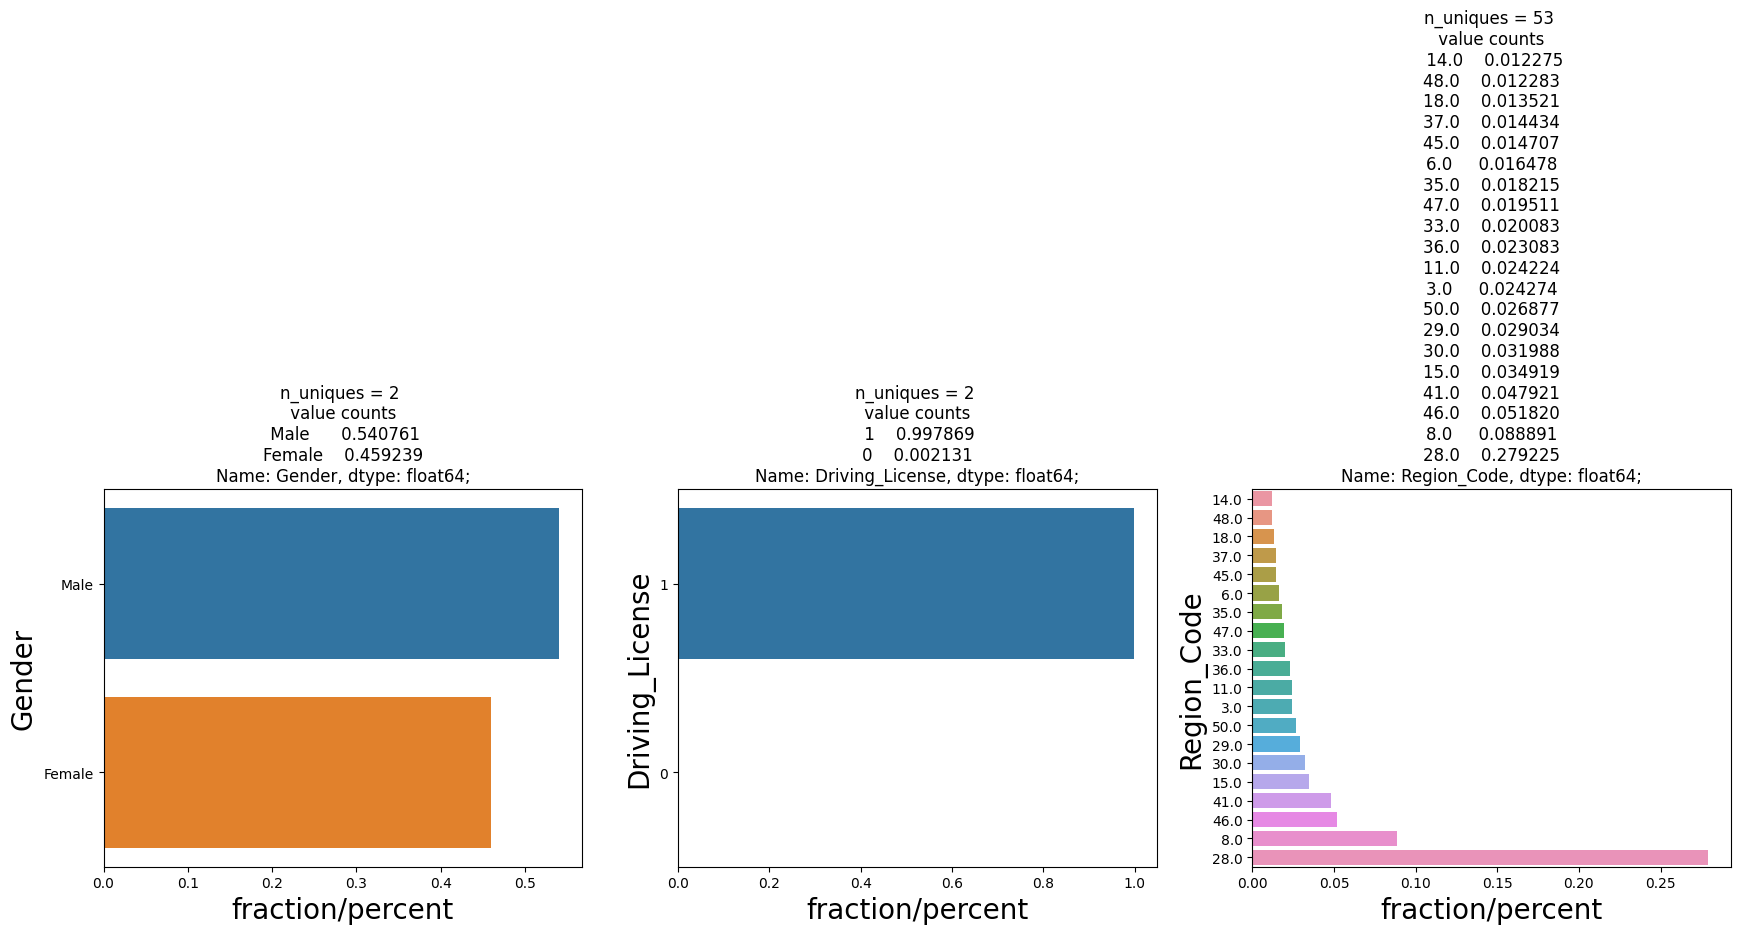

In [65]:
UVA_category(rawdf,["Gender","Driving_License","Region_Code"])

### summary
* Male customers higher than Female
* 99 % customers has a License
* Region Code 28 has a high number of customers
* Region Code 8, 46, 41 has a second high number of customers

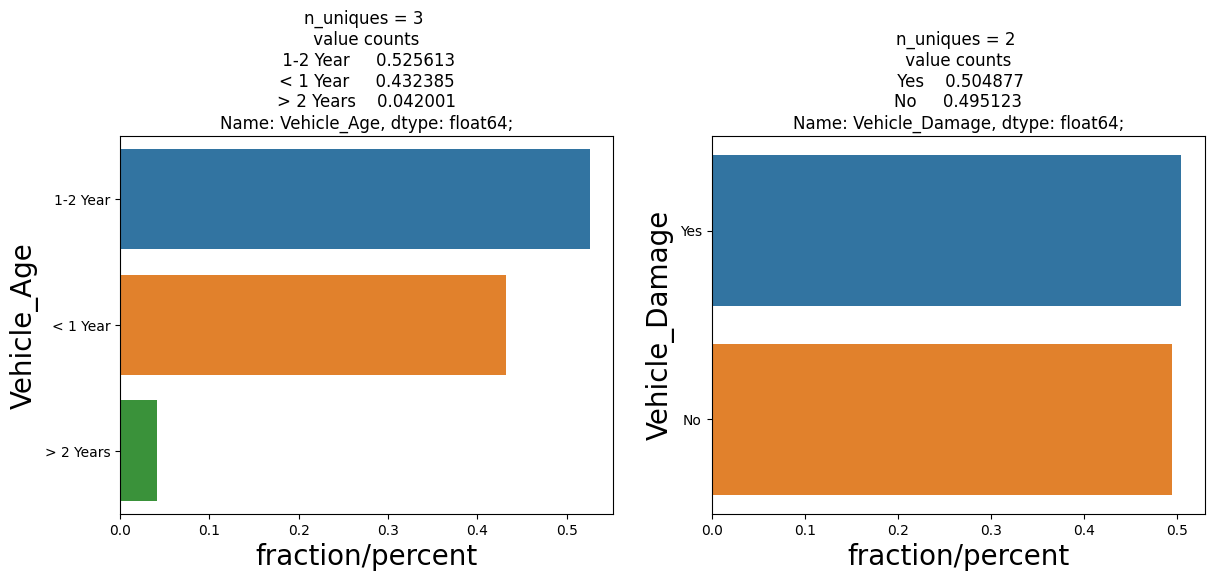

In [66]:
UVA_category(rawdf,["Vehicle_Age","Vehicle_Damage"])

### summary
* 95% Vechicle's age within 2 years
* Vehicle Damage is equally splitted

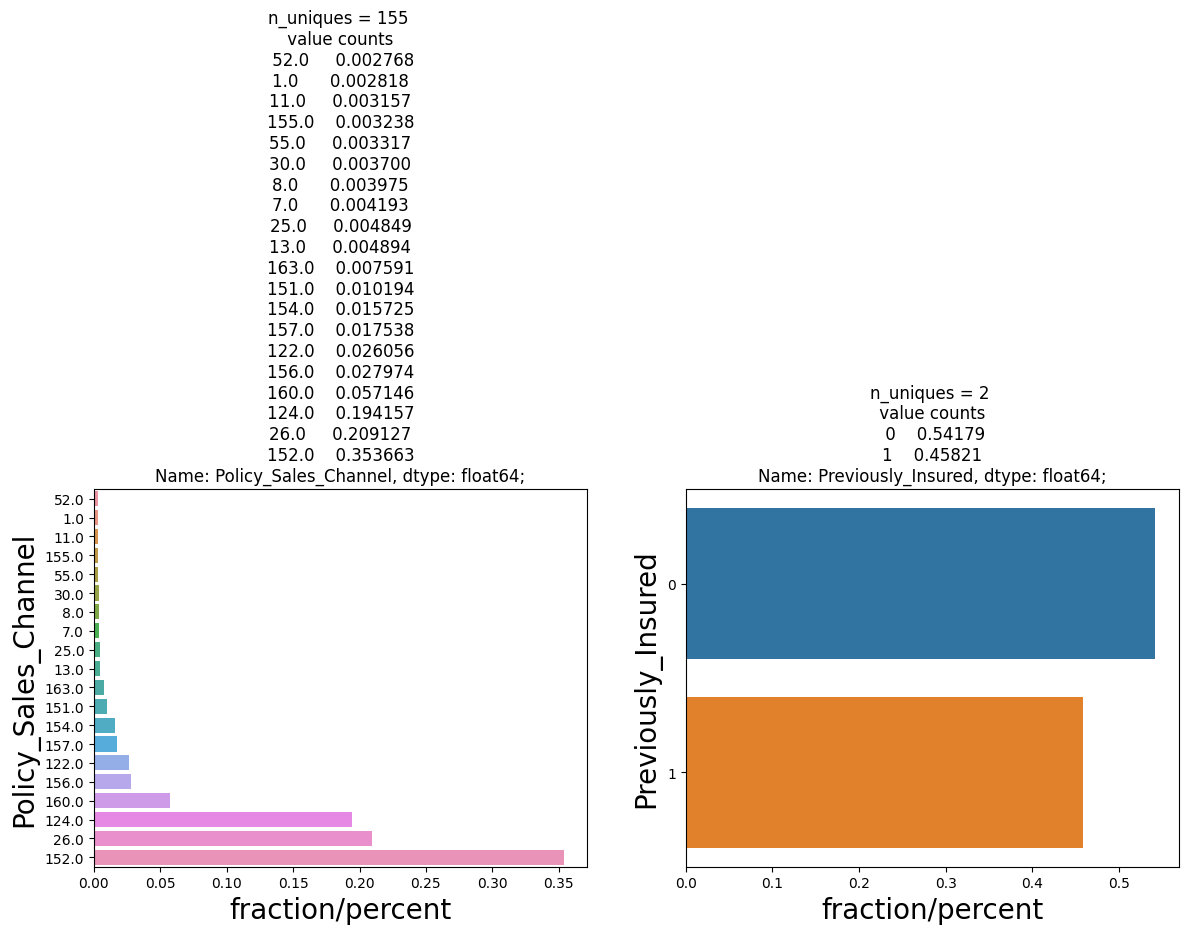

In [67]:
UVA_category(rawdf,["Policy_Sales_Channel","Previously_Insured"])

### summary
* Most used ploicy sales channel code(152,26,124,160,156,122,157,154)
* Previously Insured people was less

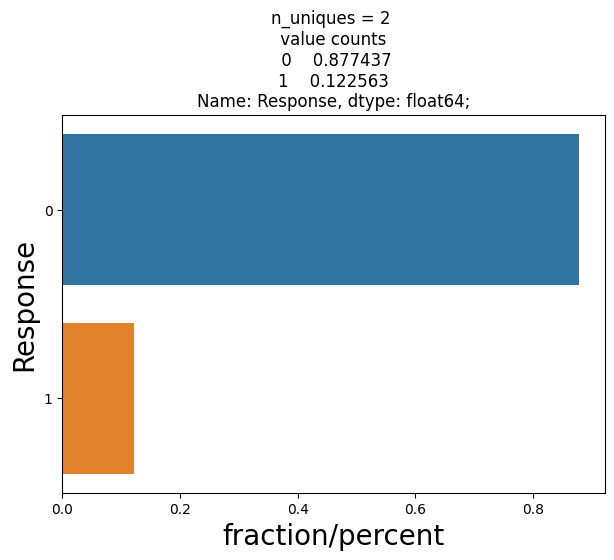

In [58]:
UVA_category(rawdf,["Response"])

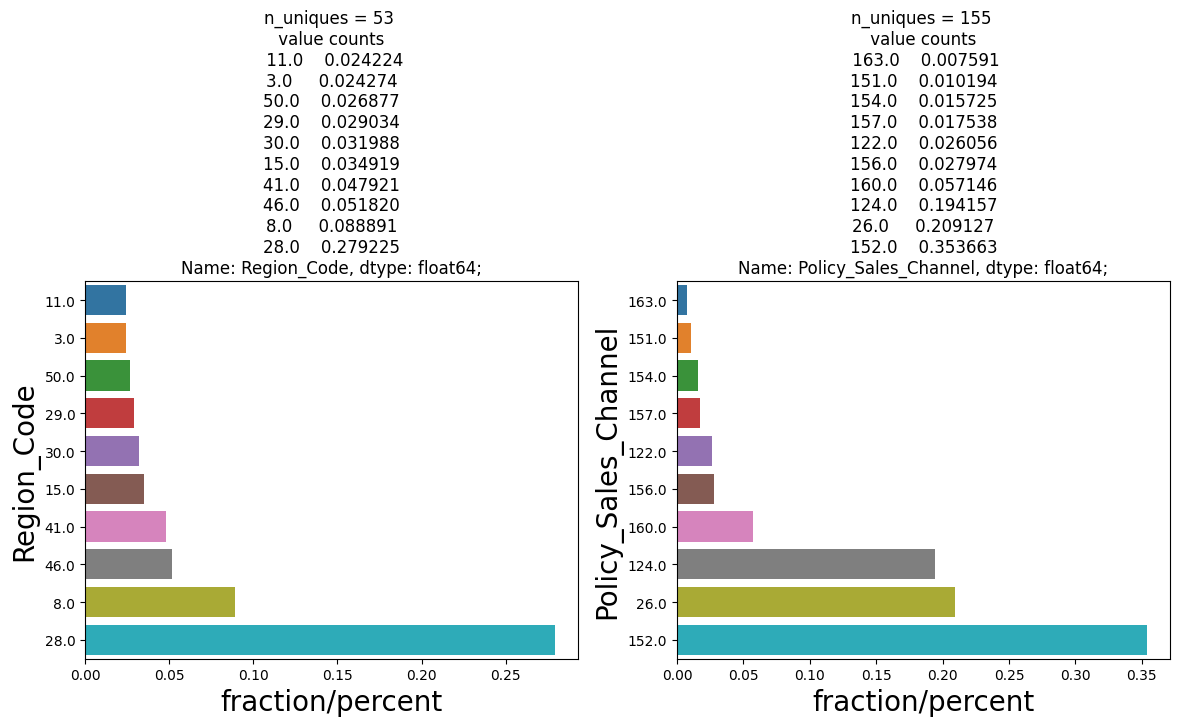

### Univariate Missing Values and Outlier Analysis

In [12]:
rawdf.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [13]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True


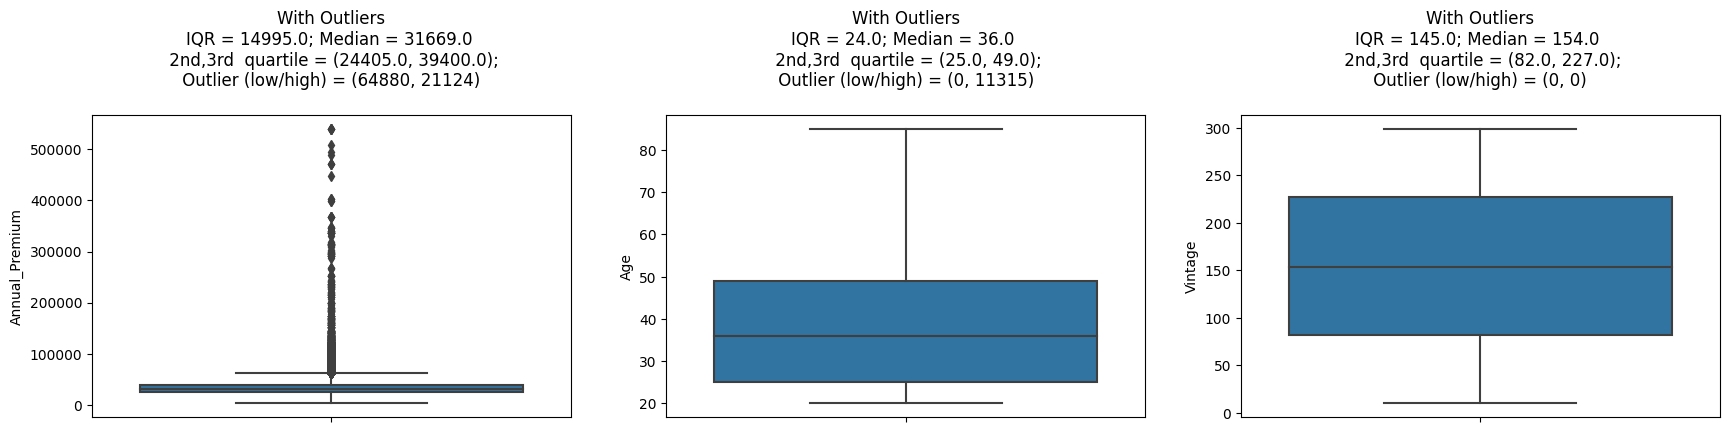

In [17]:
UVA_outlier(rawdf,["Annual_Premium","Age","Vintage"] )

### summary
* Annual premium has a extreme outlier

### Bivariate Analysis

In [27]:
numerical_data = rawdf.select_dtypes(include=["int64","Int64","float64"])
numerical_data.corr()

,id,Age,Annual_Premium,Vintage
id,1.000000,0.001561,0.003027,-0.000630
Age,0.001561,1.000000,0.067507,-0.001264
Annual_Premium,0.003027,0.067507,1.000000,-0.000608
Vintage,-0.000630,-0.001264,-0.000608,1.000000


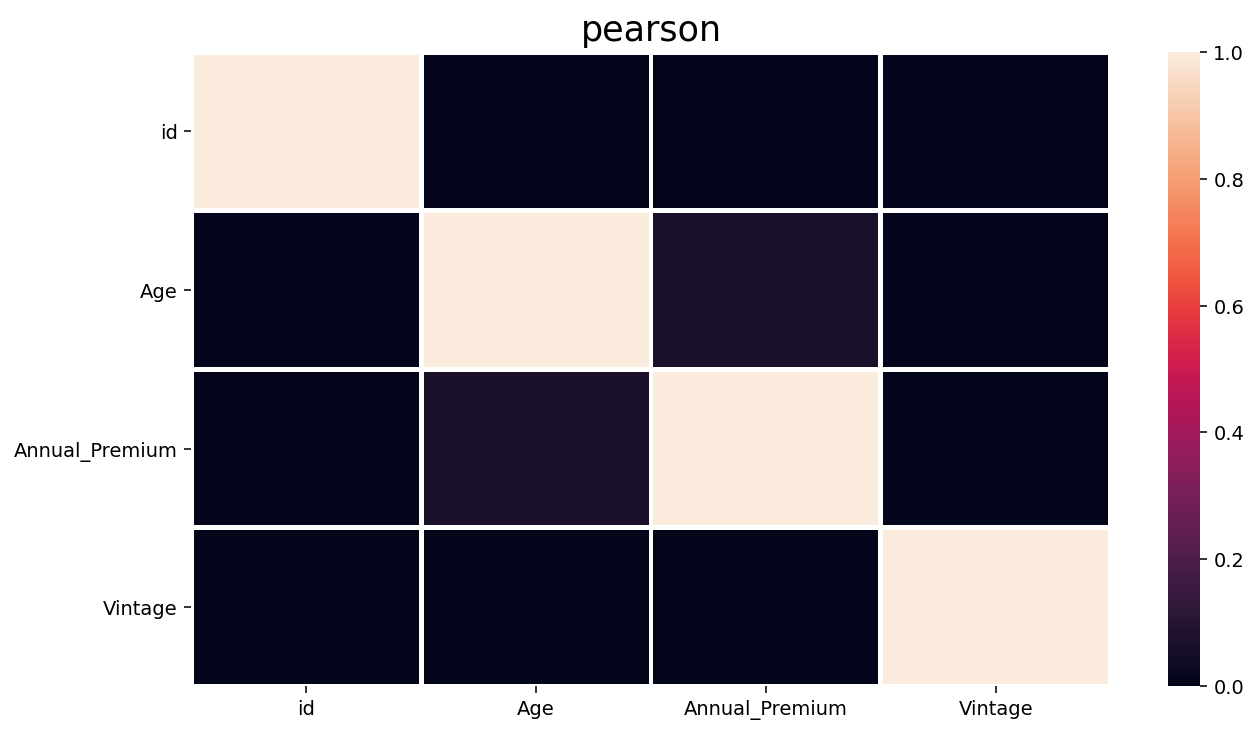

In [26]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson']):
  plt.subplot(1,3,j+1)
  correlation = numerical_data.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

### summary

* Features dont have a strong correlation



### ScatterPlot

<Figure size 840x560 with 0 Axes>

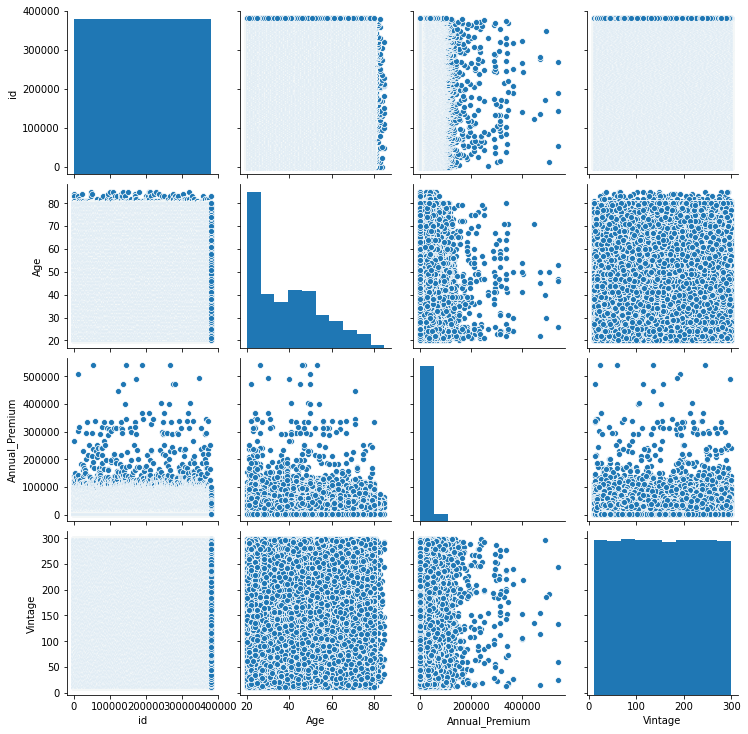

In [29]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical_data)

In [34]:
for column in ["Age","Annual_Premium","Vintage"]:
  mini=1
  if numerical_data[column].min()<0:
    mini =  abs(numerical_data[column].min()) + 1
  
  numerical_data[column] = [i+mini for i in numerical_data[column]]
  numerical_data[column] = numerical_data[column].map(lambda x : np.log(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<Figure size 840x560 with 0 Axes>

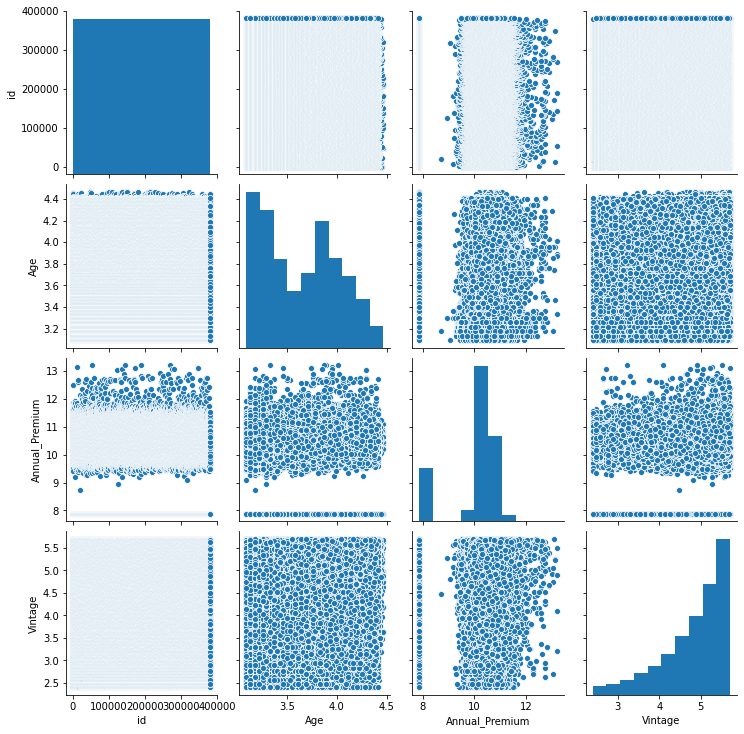

In [35]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical_data)

## Bivariate Analysis: Continuous-Categorical variables

In [21]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [22]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [23]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

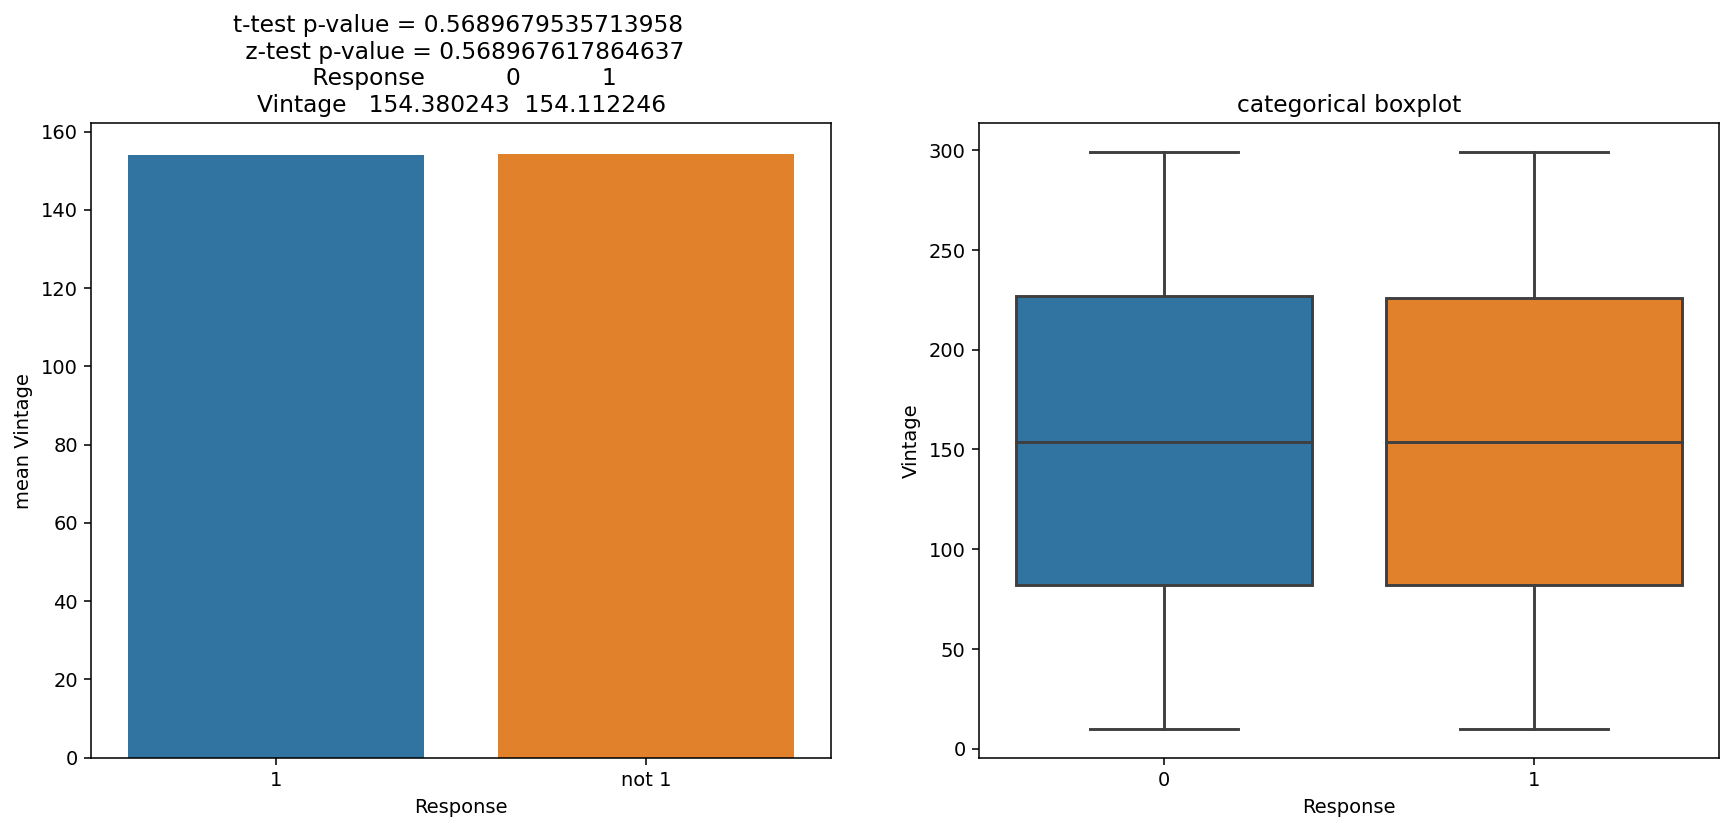

In [26]:
Bivariate_cont_cat(rawdf, 'Vintage', 'Response', 1)